# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.describe()
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [79]:
#  1. Get the total rides for each city type
city_rides_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
city_rides_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [80]:
# 2. Get the total drivers for each city type
# this should be 78 but it doesn't come to that
city_drivers_sum = pyber_data_df.groupby(["type"]).sum()["driver_count"]
city_drivers_sum

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [81]:
#  3. Get the total amount of fares for each city type
city_fares_sum = pyber_data_df.groupby(["type"]).sum()["fare"]
city_fares_sum

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [82]:
#  4. Get the average fare per ride for each city type. 
city_fares_avg = pyber_data_df.groupby(["type"]).mean()["fare"]
city_fares_avg

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [84]:
# 5. Get the average fare per driver for each city type. 
city_drivers_avg = pyber_data_df.groupby(["type"]).mean()["driver_count"]
city_drivers_avg

type
Rural        4.296000
Suburban    13.712000
Urban       36.678154
Name: driver_count, dtype: float64

In [83]:
#total fare per driver
avg_fare=city_fares_sum/city_fares_avg
avg_fare

type
Rural        125.0
Suburban     625.0
Urban       1625.0
Name: fare, dtype: float64

In [30]:
#  6a. Get the total rides for each type
type_rides_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
print(type_rides_count)

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64


In [35]:
# 6b. Get the total drivers for each type
type_drivers_sum = pyber_data_df.groupby(["type"]).sum()["driver_count"]
print(type_drivers_sum)

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64


In [32]:
#  6c. Get the total amount of fares for each type
type_fares_sum = pyber_data_df.groupby(["type"]).sum()["fare"]
print(type_fares_sum)

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64


In [33]:
#  6d. Get the average fare per ride for each type.
type_fares_avg = pyber_data_df.groupby(["type"]).mean()["fare"]
print(type_fares_avg)

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64


In [34]:
# 6e. Get the average fare per driver for each city type. . 
type_drivers_avg = pyber_data_df.groupby(["type"]).mean()["driver_count"]
print(type_drivers_avg)

type
Rural        4.296000
Suburban    13.712000
Urban       36.678154
Name: driver_count, dtype: float64


In [36]:
# 6. Create Summary DataFrame 
pyber_summary_df1= pd.merge(type_rides_count,type_drivers_sum, how="left",on="type")
pyber_summary_df2= pd.merge(pyber_summary_df1, type_fares_sum, how="left",on="type")
pyber_summary_df3= pd.merge(pyber_summary_df2, type_fares_avg, how="left",on="type")
pyber_summary_df= pd.merge(pyber_summary_df3, type_drivers_avg, how="left",on="type")
pyber_summary_df.head()

,ride_id,driver_count_x,fare_x,fare_y,driver_count_y
type,,,,,
Rural,125,537,4327.93,34.623440,4.296000
Suburban,625,8570,19356.33,30.970128,13.712000
Urban,1625,59602,39854.38,24.525772,36.678154


In [37]:
# 6. Create Summary DataFrame with column names
pyber_summary_column_names=['Total_Rides','Total_Drivers','Total_Fares', 'Average Fare Per Ride','Average Fare Per Driver']
pyber_summary_df.columns= pyber_summary_column_names
pyber_summary_df.head()

,Total_Rides,Total_Drivers,Total_Fares,Average Fare Per Ride,Average Fare Per Driver
type,,,,,
Rural,125,537,4327.93,34.623440,4.296000
Suburban,625,8570,19356.33,30.970128,13.712000
Urban,1625,59602,39854.38,24.525772,36.678154


In [38]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df.head()

,Total_Rides,Total_Drivers,Total_Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,537,4327.93,34.623440,4.296000
Suburban,625,8570,19356.33,30.970128,13.712000
Urban,1625,59602,39854.38,24.525772,36.678154


In [39]:
#  8. Format the columns.
pyber_summary_df.style.format=({"{:.0}","{:.0}","${:.2f}","${:.2f}","{$:.2f}"})
pyber_summary_df.head()

,Total_Rides,Total_Drivers,Total_Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,537,4327.93,34.623440,4.296000
Suburban,625,8570,19356.33,30.970128,13.712000
Urban,1625,59602,39854.38,24.525772,36.678154


In [86]:
pyber_summary_df['Total_Rides']=pyber_summary_df['Total_Rides'].map("{:,}".format)
pyber_summary_df['Total_Drivers']=pyber_summary_df['Total_Drivers'].map("{:,}".format)
pyber_summary_df['Total_Fares']=pyber_summary_df['Total_Fares'].map("${:,.2f}".format)
pyber_summary_df['Average Fare Per Ride']=pyber_summary_df['Average Fare Per Ride'].map("${:,.2f}".format)
pyber_summary_df['Average Fare Per Driver']=pyber_summary_df['Average Fare Per Driver'].map("${:,.2f}".format)
pyber_summary_df.head()

,Total_Rides,Total_Drivers,Total_Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,537,"$4,327.93",$34.62,$4.30
Suburban,625,"8,570","$19,356.33",$30.97,$13.71
Urban,"1,625","59,602","$39,854.38",$24.53,$36.68


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [40]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [87]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
fares_sum_df = pyber_data_df.groupby(["type","date"]).sum()["fare"]
fares_sum_df.head

<bound method NDFrame.head of type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64>

In [88]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fares_sum_df = fares_sum_df.reset_index()
fares_sum_df.head()

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [89]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
type_date_pivot = pyber_data_df.pivot(index="date", columns="type", values="fare")
type_date_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [90]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
tripcounts_Jan_Apr = type_date_pivot.loc['2019-01-01':'2019-04-29']
tripcounts_Jan_Apr

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [91]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

tripcounts_Jan_Apr.index = pd.to_datetime(tripcounts_Jan_Apr.index)
tripcounts_Jan_Apr

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [93]:
# 7. Check that the datatype for the index is datetime using df.info()
tripcounts_Jan_Apr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [94]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
resample_tripscount=tripcounts_Jan_Apr.resample('W').sum()
resample_tripscount

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


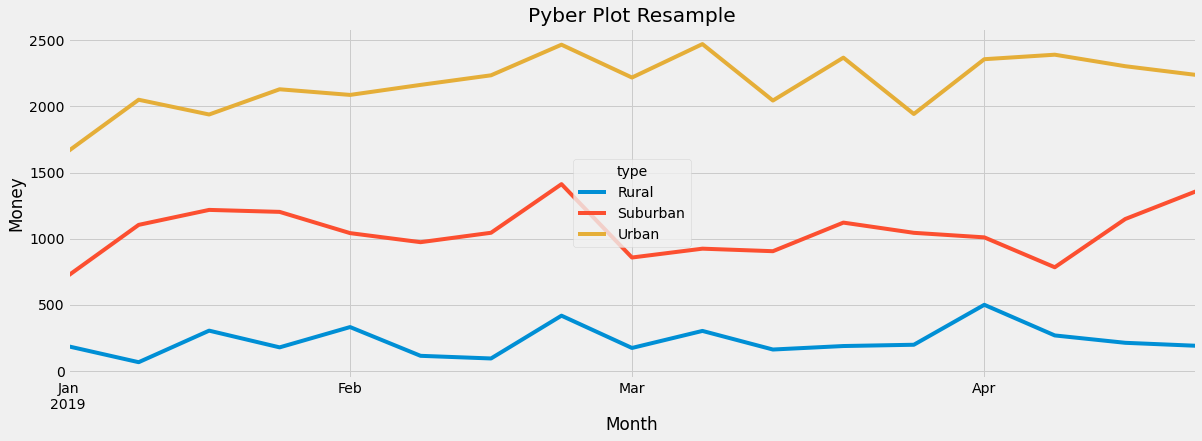

In [95]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

plot_resample_df=resample_tripscount.plot(figsize=(18,6))
plot_resample_df.set_title("Pyber Plot Resample")
plot_resample_df.set_xlabel("Month")
plot_resample_df.set_ylabel("Money")

plt.savefig("Analysis/money_summary_bymonth.png")
plt.show()